Laplace Smoothing: 0.1 <> Naive Bayes Accuracy: 68.51851851851852 %
Laplace Smoothing: 0.5 <> Naive Bayes Accuracy: 68.51851851851852 %
Laplace Smoothing: 1.0 <> Naive Bayes Accuracy: 66.66666666666666 %
Laplace Smoothing: 10 <> Naive Bayes Accuracy: 62.96296296296296 %
Laplace Smoothing: 100 <> Naive Bayes Accuracy: 61.111111111111114 %


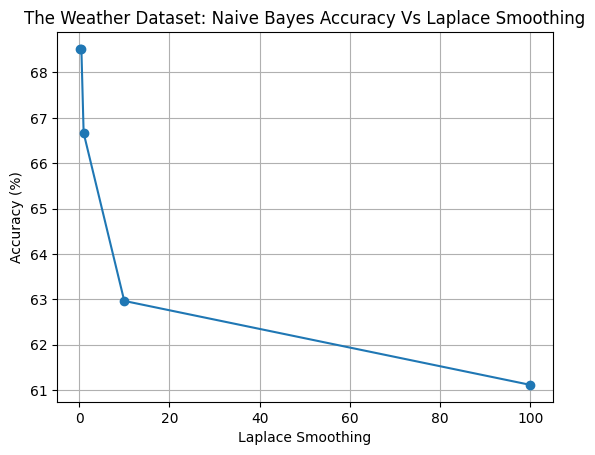

LOGISTIC REGRESSION >> WEATHER DATASET
Learning Rate: 0.0001 Accuracy: 53.70370370370371
Learning Rate: 0.001 Accuracy: 53.70370370370371
Learning Rate: 0.01 Accuracy: 51.85185185185185
Learning Rate: 0.1 Accuracy: 48.148148148148145
Learning Rate: 1.0 Accuracy: 51.85185185185185
Learning Rate: 1.5 Accuracy: 46.2962962962963


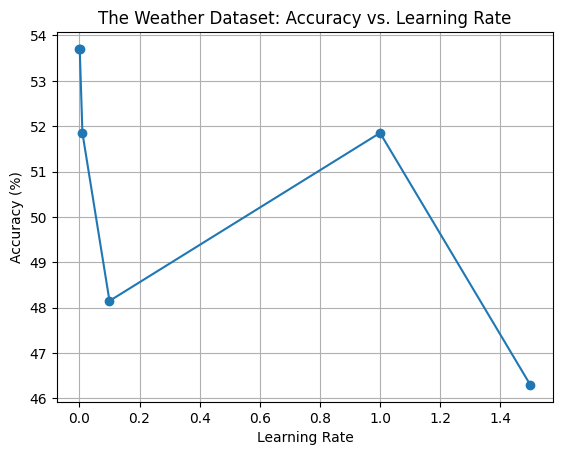

In [4]:
import math
import random
from collections import Counter, defaultdict
from matplotlib import pyplot as plt
import time
import numpy as np
from cmath import exp, pi, sqrt
from naive_bayes import NaiveBayes
from logistic_regression import LogisticRegression


def accuracy_score(true_labels, pred_labels):

    correct = 0
    for true, pred in zip(true_labels, pred_labels):
        if true == pred:
            correct += 1

    return (correct / len(true_labels))*100



# for naive bayes
# ============================================================================
train = []
filename = 'Prob/train.csv'

with open(filename, 'r') as file:
    for ind, line in enumerate(file):    
        line = line.strip()
        if line:
            train.append(line.split(','))
            
test = []
filename = 'Prob/test.csv'

with open(filename, 'r') as file:
    for ind, line in enumerate(file):    
        line = line.strip()
        if line:
            test.append(line.split(','))


train_features = [x[:-1] for x in train]
train_labels = [x[-1] for x in train]
test_features = [x[:-1] for x in test]
test_labels = [x[-1] for x in test]

laplace_smoothings =  [0.1, 0.5, 1.0, 10, 100]
accuracy_result = []

for smoothing in laplace_smoothings:

    naive_bayes = NaiveBayes(laplace_smoothing=smoothing, total_data=len(train_labels))
    naive_bayes.train(train_features, train_labels)
    naive_bayes_predictions = naive_bayes.test(test_features)
    naive_bayes_accuracy = accuracy_score(test_labels, naive_bayes_predictions)
    print(f"Laplace Smoothing: {smoothing}", "<> Naive Bayes Accuracy:", naive_bayes_accuracy, '%')
    accuracy_result.append(naive_bayes_accuracy)



plt.plot(laplace_smoothings, accuracy_result, marker='o')
plt.xlabel('Laplace Smoothing')
plt.ylabel('Accuracy (%)')
plt.title('The Weather Dataset: Naive Bayes Accuracy Vs Laplace Smoothing')
plt.grid(True)
plt.show()

# for logistic regression
# ============================================================================
term_num_map = {
    'Rainy': 1, 'Sunny': 2, 'Cloudy': 3, 'Humid': 0,
    'Summer': 1, 'Winter': 2, 'Autumn': 3, 'Spring': 0,
    'Cold': 1, 'Hot': 2, 'Normal': 0,
    'Coast Line': 1, 'Costline': 1, 'Inland': 0,
    'Low': 1, 'High': 0,
    'Africa': 1, 'North America': 2, 'Australia': 0, 
}


train = []
filename = 'Prob/train.csv'

with open(filename, 'r') as file:
    for ind, line in enumerate(file):    
        line = line.strip()
        temp = []
        for token in line.split(','):
            temp.append(term_num_map.get(token, 0))

        train.append(temp)
            
test = []
filename = 'Prob/test.csv'

with open(filename, 'r') as file:
    for ind, line in enumerate(file):    
        line = line.strip()
        temp = []
        for token in line.split(','):
            temp.append(term_num_map.get(token, 0))
            
        test.append(temp)


train_features = [x[:-1] for x in train]
train_labels = [x[-1] for x in train]
test_features = [x[:-1] for x in test]
test_labels = [x[-1] for x in test]

learning_rates = [0.0001, 0.001, 0.01, 0.1, 1.0, 1.5]
accuracy = []



print('LOGISTIC REGRESSION >> WEATHER DATASET')
for rate in learning_rates:

    logistic_regression = LogisticRegression(num_classes=3, learning_rate=rate, training_epochs=1000)
    logistic_regression.train(np.array(train_features), np.array(train_labels))

    logistic_regression_predictions = logistic_regression.test(test_features)
    logistic_regression_accuracy = accuracy_score(test_labels, logistic_regression_predictions)
    accuracy.append(logistic_regression_accuracy)
    print(f'Learning Rate: {rate}', f'Accuracy: {logistic_regression_accuracy}')

plt.plot(learning_rates, accuracy, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy (%)')
plt.title('The Weather Dataset: Accuracy vs. Learning Rate')
plt.grid(True)
plt.show()

